# Análise Preditiva de Demanda: Estudo de Caso Walmart Sales

## Introdução

A previsão de demanda é um componente essencial para o sucesso de qualquer operação de varejo. A capacidade de prever com precisão as vendas futuras permite que empresas como o Walmart otimizem seus estoques, planejem campanhas de marketing eficazes e ajustem suas operações para maximizar a eficiência e a satisfação do cliente. Neste projeto, utilizaremos o dataset **Walmart Sales**, que contém informações detalhadas sobre as vendas semanais em várias lojas do Walmart, para desenvolver um modelo de análise preditiva de demanda.

### Objetivo do Projeto

O objetivo principal deste projeto é desenvolver modelos que possam prever as vendas semanais de diferentes departamentos dentro das lojas Walmart. Faremos uso de técnicas de machine learning e análise de séries temporais para capturar padrões nas vendas e avaliar o impacto de fatores externos, como feriados e condições econômicas.

### Estrutura do Dataset

O dataset Walmart Sales inclui as seguintes variáveis principais:

- **Store**: Identificação da loja.
- **Dept**: Identificação do departamento.
- **Date**: Data da venda.
- **Weekly_Sales**: Vendas semanais em dólares.
- **IsHoliday**: Indicador se a semana corresponde a um feriado.
- **Temperature, Fuel_Price, CPI, Unemployment**: Variáveis econômicas e externas que podem influenciar as vendas.

### Metodologia

A metodologia aplicada neste projeto será composta pelas seguintes etapas:

1. **Exploração e Entendimento dos Dados (EDA)**: Análise inicial dos dados para entender a distribuição das vendas, identificar tendências sazonais e avaliar a influência de variáveis externas.
   
2. **Preparação dos Dados**: Inclui a limpeza dos dados, tratamento de valores ausentes, e a criação de novas features que possam melhorar a capacidade preditiva dos modelos.

3. **Modelagem**: Aplicação de modelos de machine learning e séries temporais para prever as vendas semanais. Modelos básicos como regressão linear serão implementados primeiro, seguidos por modelos mais sofisticados como Random Forest e ARIMA.

4. **Avaliação**: Os modelos serão avaliados usando métricas como MSE e RMSE para garantir que as previsões sejam precisas e úteis.

5. **Implementação e Visualização**: Criação de dashboards e gráficos que apresentem as previsões de forma clara, permitindo que as partes interessadas tomem decisões informadas.

### Conclusão

Este projeto fornecerá uma visão prática sobre como utilizar dados históricos e técnicas avançadas de modelagem para prever a demanda em um ambiente de varejo. As conclusões obtidas poderão ser aplicadas para otimizar operações e melhorar a eficiência geral nas lojas Walmart, oferecendo um exemplo valioso de como a análise preditiva pode gerar valor significativo no setor de varejo.



# **(I) - Exploração e Entendimento dos Dados (EDA)**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/jvlopess/Walmart-Sales-Forecasting/main/Walmart_Sales.csv'

# Carregando o dataset
df = pd.read_csv(url)

# Exibindo as primeiras linhas
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Feature


In [3]:
# Garantindo que a coluna 'Date' seja do tipo datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Função para mapear datas para estações do ano
def map_to_season(date):
    # Extrai o mês da data
    month = date.month

    # Mapeamento dos meses para as estações do ano
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"


In [4]:
# Aplicando a função ao DataFrame para criar a coluna 'Season'
df['Season'] = df['Date'].apply(map_to_season)

# Extraindo o ano da coluna 'Date'
df['Year'] = df['Date'].dt.year

# Extraindo o mês da coluna 'Date'
df['Month'] = df['Date'].dt.month

# Extraindo o nome do mês da coluna 'Date'
df['Month_Name'] = df['Date'].dt.strftime('%B')

# Extraindo o dia da coluna 'Date'
df['Day'] = df['Date'].dt.day

# Extraindo o dia da semana da coluna 'Date' (0 = Segunda-feira, 6 = Domingo)
df['Day_of_Week'] = df['Date'].dt.weekday

# Exibindo uma amostra do DataFrame para verificar as alterações
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Season,Year,Month,Month_Name,Day,Day_of_Week
4885,35,2010-07-16,1124414.87,0,78.26,2.783,136.417983,8.861,Summer,2010,7,July,16,4
2578,19,2010-03-05,1495844.57,0,32.92,2.919,131.735000,8.350,Spring,2010,3,March,5,4
1673,12,2012-01-06,945823.65,0,50.43,3.599,130.157516,12.187,Winter,2012,1,January,6,4
3341,24,2011-02-04,1225182.04,0,23.83,3.400,133.183419,8.252,Winter,2011,2,February,4,4
1100,8,2011-12-30,858572.22,1,36.33,3.129,223.057677,6.123,Winter,2011,12,December,30,4


## Vizualização

In [5]:
# Visualização inicial dos dados
print("Dimensões do Dataset:", df.shape)
print("Colunas do Dataset:", df.columns)
print("Primeiras linhas do Dataset:")
print(df.head())

Dimensões do Dataset: (6435, 14)
Colunas do Dataset: Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Season', 'Year', 'Month',
       'Month_Name', 'Day', 'Day_of_Week'],
      dtype='object')
Primeiras linhas do Dataset:
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Season  Year  Month Month_Name  Day  Day_of_Week  
0  211.096358         8.106  Winter  2010      2   February    5            4  
1  211.242170         8.106  Winter  2010      2   February   12            4  
2  211.289143

In [6]:
# Resumo estatístico dos dados numéricos
print("Resumo Estatístico:")
print(df.describe())

# Verificando valores ausentes
print("Valores Ausentes:")
print(df.isnull().sum())

Resumo Estatístico:
             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment         Year  \
count  6435.000000  6435.000000  6435.000000   6435.000000  6435.000000   
mean     60.663782     3.358607   171.578394      7.999151  2010.965035   
min      -2.060000     2.472000   126.064000      3.879000  2010.000000   
25%      47.460000     2.933000   131.73

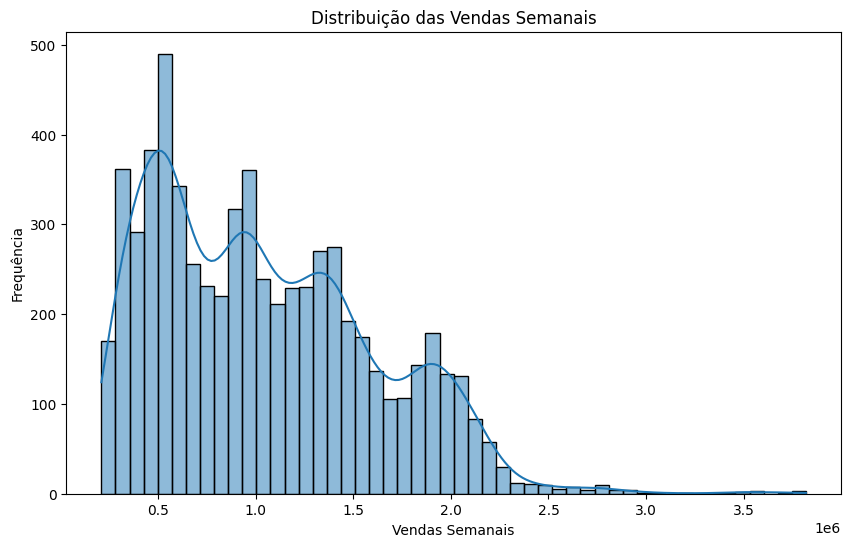

In [7]:
# Distribuição das Vendas Semanais
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribuição das Vendas Semanais')
plt.xlabel('Vendas Semanais')
plt.ylabel('Frequência')
plt.show()


### Conclusão da Análise da Distribuição das Vendas Semanais

O gráfico de distribuição das vendas semanais revela algumas características importantes sobre o comportamento das vendas nas lojas do Walmart:

1. **Assimetria Positiva**: A distribuição é assimétrica à direita, com uma longa cauda que se estende para valores de vendas mais altos. Isso indica que, enquanto a maioria das lojas registra vendas semanais em torno de um valor central (em torno de $500.000 - $1.000.000), há algumas semanas com vendas excepcionalmente altas, que se destacam no conjunto de dados.

2. **Picos Múltiplos**: Observa-se a presença de múltiplos picos, sugerindo que as vendas não seguem uma distribuição uniforme. Esses picos podem estar associados a semanas específicas, como períodos de promoção, feriados ou eventos especiais que impulsionam as vendas em determinados momentos.

3. **Variedade de Desempenho entre as Lojas**: A ampla variação na frequência das vendas sugere que diferentes lojas ou grupos de lojas têm desempenhos muito variados, o que pode ser devido a fatores como localização, tamanho da loja, ou estratégias de marketing locais.

4. **Densidade na Faixa de Vendas Moderadas**: A maioria das lojas parece operar em uma faixa de vendas semanal que vai de cerca de $500.000 até $1.500.000. Isso pode ser considerado o "padrão" para as vendas, com a maioria das semanas caindo nesta faixa.


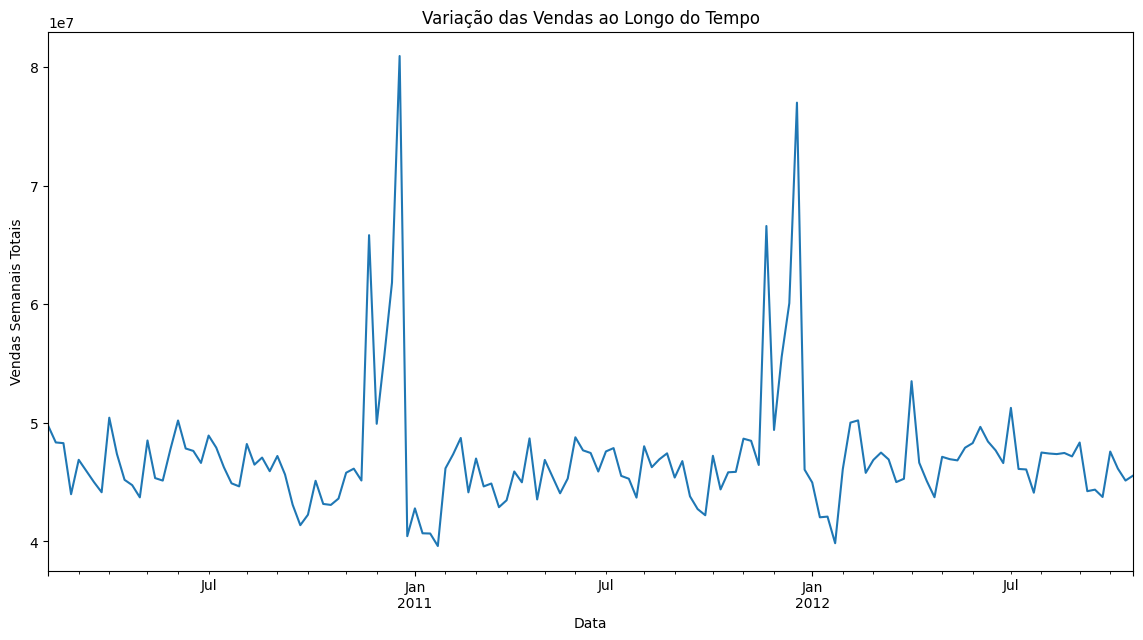

In [8]:
# Vendas ao longo do tempo
plt.figure(figsize=(14, 7))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Variação das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Semanais Totais')
plt.show()


### Conclusão da Análise da Variação das Vendas ao Longo do Tempo

O gráfico de variação das vendas ao longo do tempo oferece alguns insights importantes sobre o comportamento das vendas nas lojas do Walmart:

1. **Picos Significativos em Fim de Ano**: Observamos picos notáveis nas vendas, especialmente em torno do período de novembro a dezembro de cada ano. Esses picos provavelmente correspondem às vendas da Black Friday e do período de compras natalinas, que são épocas de alta demanda no varejo. Esses picos são seguidos por quedas acentuadas nas vendas após o final do ano.

2. **Tendência Geral Estável**: Fora dos picos de fim de ano, as vendas se mantêm relativamente estáveis, com pequenas flutuações. Isso sugere que, fora das temporadas de compras, o volume de vendas não varia drasticamente, mantendo um padrão constante.

3. **Sazonalidade e Variações**: Embora o gráfico mostre picos claros nos meses de novembro e dezembro, há também algumas variações sazonais menores ao longo do ano. Analisar essas variações em combinação com as estações do ano e outros fatores sazonais pode fornecer insights adicionais.

4. **Impacto de Fatores Externos**: O padrão de picos e vales pode estar relacionado não apenas às épocas do ano, mas também a fatores externos, como campanhas de marketing, mudanças econômicas ou eventos imprevistos que afetam o consumo.

### Próximos Passos
Agora, podemos explorar como as vendas variam entre as diferentes estações do ano (`Season`) para ver se há padrões adicionais que possam ser extraídos. Isso nos ajudará a entender melhor como fatores sazonais influenciam o comportamento de compra ao longo do ano.

Podemos seguir com uma análise das **vendas sazonais**, onde compararemos as vendas totais em cada uma das estações (Spring, Summer, Autumn, Winter).


<ipython-input-9-42fc44f15888>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y='Weekly_Sales', data=df, palette="Set3")


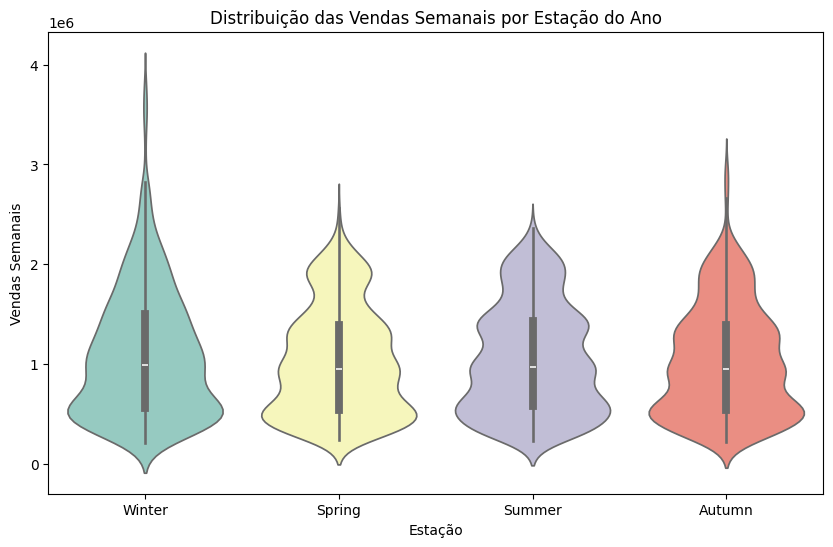

In [9]:
# Violin Plot das Vendas Sazonais
plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='Weekly_Sales', data=df, palette="Set3")
plt.title('Distribuição das Vendas Semanais por Estação do Ano')
plt.xlabel('Estação')
plt.ylabel('Vendas Semanais')
plt.show()

### Conclusão da Análise das Vendas Semanais por Estação do Ano

O **violin plot** das vendas semanais por estação do ano revela insights interessantes sobre como as vendas se comportam ao longo das diferentes estações:

1. **Inverno (Winter)**:
   - **Distribuição Mais Estendida**: O violino do inverno é mais estendido, com uma densidade alta em valores mais elevados de vendas. Isso sugere que o inverno, que inclui o período de compras de fim de ano (como a Black Friday e o Natal), tende a ser uma estação de vendas excepcionalmente altas para o Walmart.
   - **Maior Variabilidade**: A variabilidade das vendas é maior no inverno, com um alcance que vai desde valores baixos até picos muito altos. Isso indica que algumas semanas de inverno apresentam vendas muito mais altas do que outras.

2. **Primavera (Spring), Verão (Summer), Outono (Autumn)**:
   - **Distribuições Mais Uniformes**: As estações de primavera, verão e outono apresentam distribuições mais compactas, com menor variabilidade em comparação ao inverno. As vendas nestas estações parecem ser mais estáveis e concentradas em uma faixa menor de valores.
   - **Médias Similares**: Embora haja alguma variação entre as estações, a mediana das vendas semanais não difere drasticamente entre primavera, verão e outono. Isso sugere que, fora dos picos de vendas de fim de ano, o padrão de vendas é relativamente consistente ao longo dessas estações.

3. **Autumn (Outono)**:
   - **Ligeiro Aumento**: O outono mostra um ligeiro aumento na extensão dos valores de vendas, que começa a se aproximar dos padrões observados no inverno, provavelmente devido ao início da temporada de compras de fim de ano.

### Implicações para o Negócio
- **Foco em Estratégias de Inverno**: Dado que o inverno apresenta a maior variabilidade e potencial de vendas, estratégias de marketing e estoque devem ser intensificadas durante essa estação para capitalizar ao máximo as oportunidades de vendas.
- **Previsão de Vendas**: A previsão de demanda pode ser ajustada sazonalmente, com expectativas de vendas mais altas no inverno e um volume mais estável nas outras estações.
- **Oportunidades de Crescimento**: Pode haver oportunidades para explorar novas estratégias em primavera, verão e outono para elevar as vendas nessas estações, possivelmente com campanhas sazonais que não dependem dos picos de fim de ano.

### Próximos Passos
Seria interessante explorar as vendas semanais específicas durante eventos conhecidos (como Black Friday ou a semana do Natal) para ver como esses eventos contribuem para os picos observados no inverno. Além disso, uma análise detalhada das vendas por loja ou região durante diferentes estações pode fornecer insights adicionais.


<ipython-input-10-2a1a606951dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette="coolwarm", jitter=True)


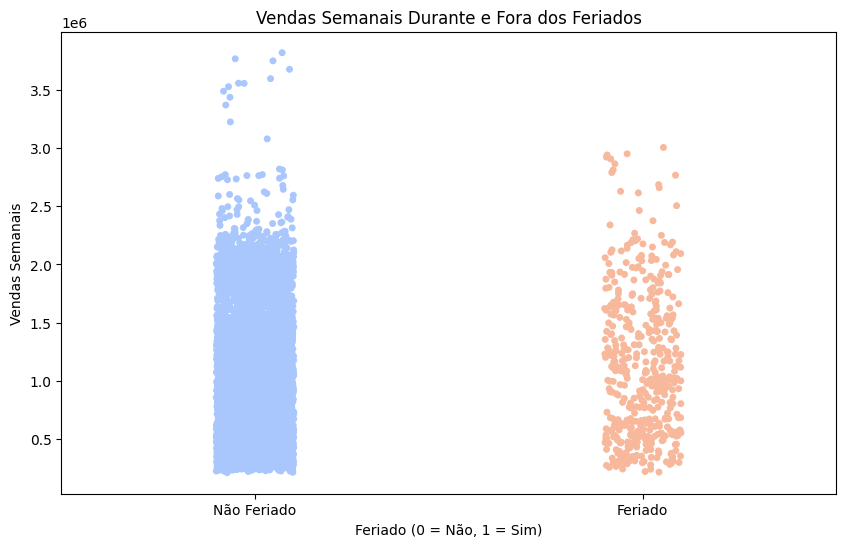

In [10]:
# Strip Plot das Vendas Semanais durante e fora dos feriados
plt.figure(figsize=(10, 6))
sns.stripplot(x='Holiday_Flag', y='Weekly_Sales', data=df, palette="coolwarm", jitter=True)
plt.title('Vendas Semanais Durante e Fora dos Feriados')
plt.xlabel('Feriado (0 = Não, 1 = Sim)')
plt.ylabel('Vendas Semanais')
plt.xticks([0, 1], ['Não Feriado', 'Feriado'])
plt.show()

### Conclusão da Análise das Vendas Semanais Durante e Fora dos Feriados

O **strip plot** das vendas semanais durante e fora dos feriados revela algumas características importantes:

1. **Distribuição das Vendas**:
   - **Semanas Sem Feriados**: Observamos que as vendas semanais durante semanas sem feriados têm uma maior densidade de dados, com muitas semanas registrando vendas próximas a `$2.000.000`. Há também um número considerável de semanas com vendas superiores a `$3.000.000`, sugerindo que mesmo fora dos feriados, algumas semanas têm um desempenho excepcional.
   - **Semanas de Feriado**: As vendas nas semanas de feriado, embora geralmente concentradas na faixa entre `$1.000.000` e `$2.000.000`, apresentam uma dispersão menor em comparação com semanas normais. No entanto, ainda há outliers que alcançam vendas superiores a $2.500.000.

2. **Impacto dos Feriados**:
   - **Menor Variabilidade**: A menor variabilidade nas vendas durante semanas de feriado pode indicar que, embora os feriados aumentem o volume de vendas, esse aumento tende a ser mais uniforme em comparação com semanas normais, onde outros fatores podem influenciar as vendas de maneira mais variada.
   - **Concentração em Valores Específicos**: As semanas de feriado parecem ser menos propensas a registrar tanto vendas excepcionalmente baixas quanto muito altas em comparação com semanas não feriados. Isso sugere que os feriados, enquanto aumentam as vendas, tendem a fazê-lo de maneira mais previsível.

3. **Foco Estratégico**:
   - **Previsibilidade nos Feriados**: As vendas durante os feriados são menos variáveis, o que pode permitir uma previsão mais precisa de demanda. Isso é uma vantagem para o planejamento de estoque e campanhas promocionais específicas durante essas semanas.

### Implicações para o Negócio
- **Campanhas Focadas em Feriados**: Dado o comportamento mais previsível das vendas durante semanas de feriado, campanhas de marketing e planejamento de estoque devem ser ajustados para maximizar as oportunidades de vendas nessas semanas.
- **Atenção aos Outliers em Semanas Normais**: As semanas normais apresentam maior variabilidade e outliers com vendas excepcionais. Entender o que impulsiona essas semanas de alto desempenho fora dos feriados pode revelar oportunidades adicionais para otimizar as vendas.

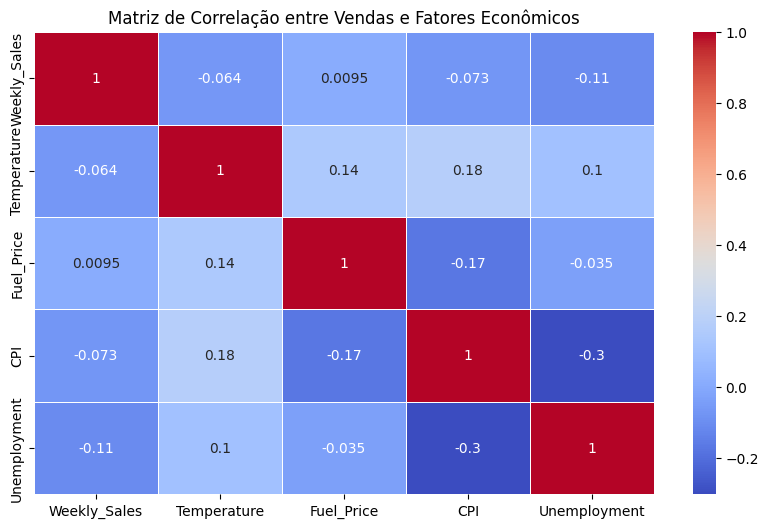

In [11]:
# Selecionando as variáveis de interesse
variables_of_interest = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Calculando a matriz de correlação
correlation_matrix = df[variables_of_interest].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Vendas e Fatores Econômicos')
plt.show()


### Conclusão da Análise da Correlação entre Vendas e Fatores Econômicos

A matriz de correlação entre as vendas semanais e os fatores econômicos selecionados oferece alguns insights importantes:

1. **Baixa Correlação Geral**:
   - Observamos que todos os fatores econômicos analisados (Temperatura, Preço de Combustível, CPI, Desemprego) apresentam uma correlação relativamente baixa com as vendas semanais. As correlações variam entre -0,11 e 0,0095, indicando que não há uma relação linear forte entre esses fatores e as vendas semanais.

2. **Temperatura**:
   - A correlação entre a temperatura e as vendas semanais é ligeiramente negativa (-0,064). Isso sugere que mudanças na temperatura não têm um impacto significativo nas vendas, ou que qualquer impacto que exista é indireto e moderado por outros fatores.

3. **Preço de Combustível (Fuel_Price)**:
   - O preço do combustível mostra uma correlação muito fraca e positiva (0,0095) com as vendas. Isso sugere que o preço do combustível tem pouca influência direta sobre as vendas semanais, o que pode ser esperado, dado que o Walmart atrai consumidores por razões além do custo de transporte.

4. **Índice de Preços ao Consumidor (CPI)**:
   - O CPI tem uma correlação negativa fraca (-0,073) com as vendas, o que sugere que variações no CPI, que refletem a inflação geral, têm um efeito pequeno, mas talvez relevante, nas vendas. Uma inflação mais alta pode reduzir o poder de compra dos consumidores, impactando negativamente as vendas.

5. **Taxa de Desemprego (Unemployment)**:
   - A taxa de desemprego também mostra uma correlação negativa fraca (-0,11) com as vendas. Isso indica que o desemprego pode ter algum impacto negativo nas vendas, mas a relação não é forte, sugerindo que outros fatores compensam ou moderam esse efeito.

### Implicações para o Modelo Preditivo

- **Prioridade de Variáveis**: Como os fatores econômicos analisados têm correlação fraca com as vendas semanais, é provável que variáveis como sazonalidade, feriados, e características específicas das lojas (como localização e tamanho) possam ter um impacto mais significativo e devam ser priorizadas no modelo preditivo.
  
- **Interações e Efeitos Não Lineares**: A baixa correlação linear não descarta a possibilidade de interações complexas entre essas variáveis e as vendas. Modelos que capturam efeitos não lineares, como árvores de decisão, random forests, ou modelos baseados em deep learning, podem ser mais eficazes para capturar essas relações complexas.

<ipython-input-12-aedda3f17452>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette="viridis")


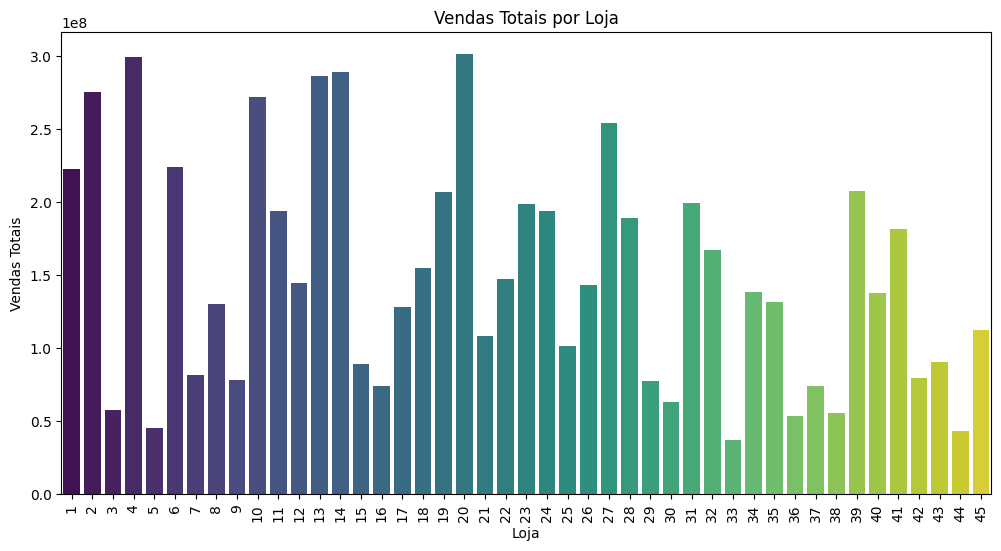

In [12]:
# Agrupando as vendas por loja, excluindo a coluna 'Date' do DataFrame
store_sales = df.drop(columns=['Date']).groupby('Store').sum().reset_index()

# Vendas Totais por Loja
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette="viridis")
plt.title('Vendas Totais por Loja')
plt.xlabel('Loja')
plt.ylabel('Vendas Totais')
plt.xticks(rotation=90)  # Rotaciona os nomes das lojas para melhor visualização
plt.show()


### Conclusão da Análise das Vendas Totais por Loja

O gráfico de barras das vendas totais por loja revela uma significativa variabilidade de desempenho entre as diferentes lojas do Walmart:

1. **Desempenho Discrepante entre Lojas**:
   - Algumas lojas, como as lojas 4, 14, 20, e 39, destacam-se com vendas totais significativamente maiores que outras. Essas lojas podem estar localizadas em regiões de alta densidade populacional, ter um tamanho maior, ou estar em áreas com menos concorrência, o que contribui para seu desempenho superior.
   - Em contrapartida, lojas como as lojas 6, 8, 18, e 34 mostram vendas totais mais baixas. Essas lojas podem estar enfrentando desafios relacionados à localização, concorrência, ou até mesmo questões operacionais que afetam suas vendas.

2. **Potencial para Otimização**:
   - As lojas com desempenho inferior apresentam oportunidades para intervenções estratégicas, como campanhas de marketing localizadas, ajustes na oferta de produtos, ou melhorias no atendimento ao cliente, com o objetivo de elevar as vendas e fechar o gap em relação às lojas de maior desempenho.

3. **Distribuição Relativamente Uniforme em Alguns Casos**:
   - Apesar da variabilidade, há uma certa uniformidade entre várias lojas (como as lojas 10 a 15 e 21 a 25), sugerindo que essas lojas podem estar operando em ambientes com características de mercado semelhantes ou que estão aplicando estratégias de venda eficazes de maneira consistente.

4. **Fatores a Serem Considerados para o Modelo Preditivo**:
   - Para criar um modelo preditivo eficaz, seria importante incluir variáveis que capturem as características específicas de cada loja, como localização geográfica, tamanho da loja, proximidade com concorrentes, e demografia local. Isso ajudaria a explicar a variabilidade nas vendas e a melhorar a precisão das previsões.


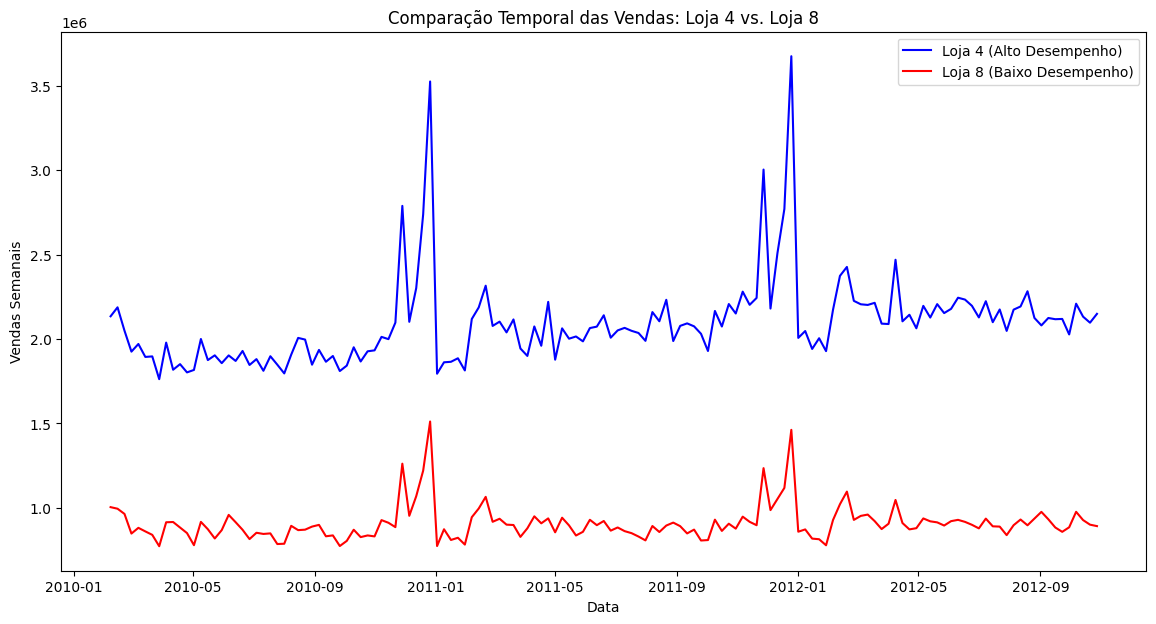

In [13]:
# Filtrando as vendas para a Loja 4 (alto desempenho) e Loja 8 (baixo desempenho)
store_4_sales = df[df['Store'] == 4].set_index('Date').resample('W').sum()
store_8_sales = df[df['Store'] == 8].set_index('Date').resample('W').sum()

# Plotando as vendas ao longo do tempo para as duas lojas
plt.figure(figsize=(14, 7))
plt.plot(store_4_sales.index, store_4_sales['Weekly_Sales'], label='Loja 4 (Alto Desempenho)', color='blue')
plt.plot(store_8_sales.index, store_8_sales['Weekly_Sales'], label='Loja 8 (Baixo Desempenho)', color='red')
plt.title('Comparação Temporal das Vendas: Loja 4 vs. Loja 8')
plt.xlabel('Data')
plt.ylabel('Vendas Semanais')
plt.legend()
plt.show()

### Conclusão da Análise Temporal Comparativa entre Loja de Alto Desempenho e Loja de Baixo Desempenho

O gráfico que compara as vendas semanais ao longo do tempo entre a **Loja 4 (Alto Desempenho)** e a **Loja 8 (Baixo Desempenho)** revela alguns padrões significativos:

1. **Picos Sazonais em Ambas as Lojas**:
   - Tanto a Loja 4 quanto a Loja 8 experimentam picos sazonais marcantes, especialmente durante o período de fim de ano (por volta de novembro e dezembro). Isso reflete a tendência geral do varejo de experimentar aumentos nas vendas durante a Black Friday, o Natal e outros eventos sazonais importantes.

2. **Diferença de Amplitude entre Picos**:
   - A Loja 4, de alto desempenho, apresenta picos muito mais pronunciados, com vendas semanais atingindo valores superiores a $3.5 milhões em comparação com a Loja 8, onde os picos de vendas raramente ultrapassam $1.5 milhão. Isso sugere que a Loja 4 tem uma capacidade muito maior de capitalizar sobre esses períodos de alta demanda.

3. **Estabilidade Relativa Fora dos Picos**:
   - Fora dos períodos de pico, a Loja 4 ainda mantém vendas semanais relativamente altas e estáveis, enquanto a Loja 8 apresenta vendas mais voláteis e em um patamar significativamente mais baixo. Isso indica que, além de se beneficiar mais dos picos sazonais, a Loja 4 também tem uma base de clientes e operações mais robustas ao longo do ano.

4. **Possíveis Fatores Contribuintes**:
   - As diferenças entre as duas lojas podem ser atribuídas a uma combinação de fatores, como:
     - **Localização**: A Loja 4 pode estar situada em uma área com maior afluência, maior densidade populacional ou menor concorrência.
     - **Tamanho e Capacidade da Loja**: A Loja 4 pode ser maior, oferecendo uma variedade mais ampla de produtos, ou pode ter uma equipe mais experiente, gerando um atendimento ao cliente superior.
     - **Demografia**: A demografia local da Loja 4 pode ser mais favorável ao consumo, com uma população que tem maior poder aquisitivo ou está mais inclinada a comprar durante picos sazonais.

### Implicações para o Modelo Preditivo
- **Consideração de Fatores Locacionais e Demográficos**: Para melhorar a precisão do modelo preditivo, seria essencial incluir variáveis que capturem as características locacionais e demográficas específicas de cada loja. Isso ajudaria a explicar por que algumas lojas, como a Loja 4, têm desempenho consistentemente superior em relação a outras, como a Loja 8.
- **Capacidade de Capturar Sazonalidade**: O modelo preditivo deve ser robusto o suficiente para capturar os picos sazonais, especialmente durante períodos como Black Friday e Natal, onde as vendas podem disparar drasticamente.
- **Atenção à Variabilidade**: A variabilidade nas vendas fora dos períodos de pico também deve ser modelada, especialmente para lojas com desempenho inferior, onde a volatilidade pode indicar oportunidades ou riscos que precisam ser geridos.

### Próximos Passos
Podemos explorar os fatores internos das lojas, como a disponibilidade de produtos específicos, campanhas promocionais, ou mesmo a eficácia da gestão e equipe de vendas. Além disso, seria interessante verificar como a introdução de novos produtos ou mudanças na política de preços afetaram as vendas ao longo do tempo em diferentes lojas. Esses insights podem ajudar a identificar ações específicas que podem ser implementadas para melhorar o desempenho das lojas de baixo rendimento.

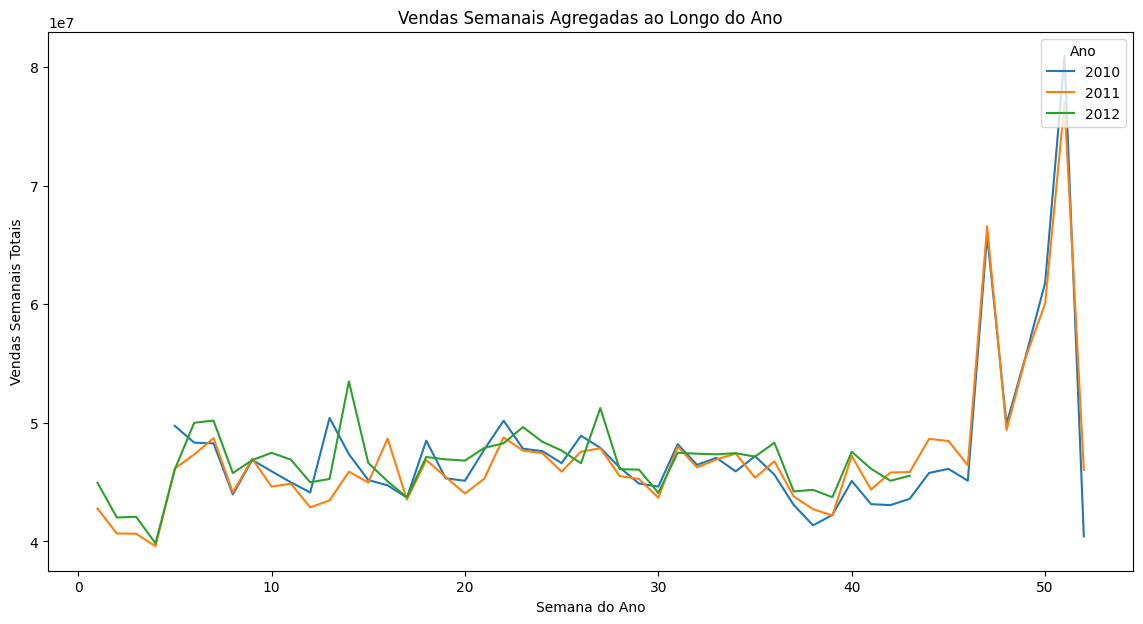

In [14]:
# Vendas Semanais Agregadas (soma de todas as lojas)
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales = df.groupby(['Year', 'Week'])['Weekly_Sales'].sum().reset_index()

# Plotando as vendas semanais ao longo do ano
plt.figure(figsize=(14, 7))
sns.lineplot(x='Week', y='Weekly_Sales', hue='Year', data=weekly_sales, palette="tab10")
plt.title('Vendas Semanais Agregadas ao Longo do Ano')
plt.xlabel('Semana do Ano')
plt.ylabel('Vendas Semanais Totais')
plt.legend(title='Ano', loc='upper right')
plt.show()


### Conclusão da Análise das Vendas Semanais Agregadas ao Longo do Ano

O gráfico que mostra as vendas semanais agregadas ao longo do ano, comparando os anos de 2010, 2011, e 2012, revela alguns padrões importantes:

1. **Picos Significativos no Final do Ano**:
   - Em todos os anos analisados, há picos claros e repetidos nas vendas durante as últimas semanas do ano, especialmente nas semanas 47 a 50. Isso coincide com a temporada de compras de fim de ano, incluindo eventos como a Black Friday e o Natal, onde o consumo atinge seu ápice. Esses picos são seguidos por uma queda acentuada logo após, provavelmente devido ao término da temporada de compras.

2. **Consistência Anual**:
   - As vendas ao longo das semanas do ano mostram um padrão relativamente consistente entre os diferentes anos. Isso sugere que, independentemente das condições econômicas ou de outros fatores externos, há uma sazonalidade previsível nas vendas que se repete ano após ano.

3. **Variações Menores ao Longo do Ano**:
   - Fora dos picos de fim de ano, as vendas semanais tendem a flutuar dentro de uma faixa mais estreita, com pequenos picos e vales. Essas variações menores podem estar relacionadas a eventos ou promoções específicas, mas não parecem ter o mesmo impacto significativo que a temporada de festas.

4. **Potenciais Promoções ou Eventos Específicos**:
   - Pequenos picos ao longo do ano, fora do período de fim de ano, podem indicar a presença de promoções ou eventos específicos que impulsionam as vendas em determinadas semanas. Isso pode incluir datas como o Dia das Mães, Dia dos Pais, ou outros feriados nacionais.

### Implicações para o Modelo Preditivo

- **Captura de Sazonalidade**: O modelo preditivo deve ser robusto para capturar esses picos sazonais previsíveis, especialmente no fim do ano. Incorporar variáveis temporais que reflitam a semana do ano e eventos sazonais pode melhorar a precisão das previsões.
  
- **Identificação de Promoções**: Se dados adicionais sobre promoções estiverem disponíveis, incorporá-los ao modelo pode ajudar a capturar esses picos menores ao longo do ano. Promoções específicas podem ser modeladas como eventos que afetam temporariamente as vendas.

- **Previsão de Vendas de Base**: O modelo também deve ser capaz de prever as vendas de base ao longo do ano, capturando as pequenas flutuações semanais que ocorrem fora dos períodos de pico.

# **(II) Construção e Avaliação do Modelo Preditivo**


## Preprocessamento dos Dados para Modelos de Regressão

Ao trabalhar com modelos de regressão como **K-Nearest Neighbors (KNN)**, **Ridge Regression**, **Lasso Regression**, e **Multiple Linear Regression (MLR)**, é fundamental preparar os dados de maneira que as características das variáveis sejam capturadas de forma eficaz. Cada um desses modelos tem suas particularidades, e o preprocessamento adequado pode influenciar significativamente o desempenho do modelo.

### Normalização

A **Normalização** é essencial para modelos como KNN, Ridge, Lasso, e MLR, pois essas técnicas de regressão são sensíveis à escala das variáveis. A normalização garante que todas as variáveis estejam na mesma escala, o que impede que variáveis com maiores amplitudes dominem o processo de ajuste do modelo.

- **Objetivo**: Equalizar as variáveis para garantir que cada uma contribua igualmente para o modelo.
- **Aplicação**: Normalizamos as vendas semanais, temperatura, preço de combustível, CPI e desemprego, o que é particularmente importante para o KNN, onde a distância entre os pontos de dados é diretamente afetada pela escala das variáveis.

### Differencing

O **Differencing** pode ser menos relevante para modelos de regressão padrão como Ridge, Lasso, e MLR, uma vez que esses modelos geralmente assumem que os dados são estacionários. No entanto, se houver tendências ou sazonalidades que precisam ser removidas, o differencing pode ajudar a estabilizar a média ao longo do tempo, embora não tenha sido aplicado diretamente no contexto dos modelos de regressão utilizados aqui.

- **Objetivo**: Estabilizar séries temporais não estacionárias, se necessário.
- **Aplicação**: No contexto de KNN, Ridge, Lasso, e MLR, o differencing pode ser considerado em casos onde as tendências impactam fortemente a linearidade dos dados.

### Janelamento (Windowing)

O **Janelamento** é frequentemente utilizado em modelos temporais mais avançados, como LSTM, mas também pode ser útil em regressões tradicionais se queremos capturar o comportamento temporal recente. No entanto, para os modelos testados (KNN, Ridge, Lasso, e MLR), optou-se por não utilizar janelamento diretamente, uma vez que esses modelos trabalham com observações independentes.

- **Objetivo**: Capturar sequências temporais em modelos que requerem entradas sequenciais.
- **Aplicação**: Janelamento não foi aplicado diretamente, pois os modelos escolhidos funcionam melhor com observações independentes.

### Escolha de Hiperparâmetros

Para cada modelo, os hiperparâmetros foram escolhidos com base em suas características e no comportamento esperado dos dados:

- **KNN (K=5)**: Escolhemos 5 vizinhos como ponto de partida para balancear a suavização das previsões sem perder detalhes importantes nas relações locais entre os pontos de dados.
  
- **Ridge (alpha=1.0)**: Um alpha moderado foi escolhido para penalizar coeficientes de maneira balanceada, mantendo um modelo simples que não sobreajusta aos dados.
  
- **Lasso (alpha=0.1)**: Escolhemos um alpha baixo para incentivar a esparsidade nos coeficientes, ajudando a selecionar as características mais relevantes sem eliminar muitas delas.
  
- **MLR (Regressão Linear Múltipla)**: Utilizada sem regularização adicional como ponto de referência para medir o impacto da regularização aplicada pelo Ridge e Lasso.

### Resumo

Este preprocessamento foi planejado para otimizar o desempenho dos modelos de regressão tradicionais em dados de séries temporais. A normalização foi a etapa mais crítica, enquanto o differencing e o janelamento foram considerados, mas não aplicados diretamente, devido às características dos modelos utilizados. A escolha dos hiperparâmetros foi feita com base na necessidade de encontrar um equilíbrio entre simplicidade e eficácia no ajuste dos dados de vendas semanais.

### Normalização

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Selecionando as colunas para normalização
cols_to_normalize = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando o scaler
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Exibindo uma amostra dos dados normalizados
df[['Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].head(10)

,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,0.397291,0.434149,0.050100,0.840500,0.405118
1,2010-02-12,0.396811,0.396967,0.038076,0.841941,0.405118
2,2010-02-19,0.388501,0.410861,0.021042,0.842405,0.405118
3,2010-02-26,0.332458,0.476419,0.044589,0.842707,0.405118
4,2010-03-05,0.372661,0.475147,0.076653,0.843008,0.405118
5,2010-03-12,0.340720,0.585616,0.097695,0.843310,0.405118
6,2010-03-19,0.349857,0.554207,0.124248,0.841679,0.405118
7,2010-03-26,0.330990,0.523581,0.130261,0.839726,0.405118
8,2010-04-02,0.383790,0.629452,0.123747,0.837773,0.376557
9,2010-04-09,0.370059,0.664579,0.149299,0.835819,0.376557


In [20]:
from sklearn.preprocessing import OneHotEncoder

# Definindo X e y
X = df.drop(columns=['Weekly_Sales', 'Date'])  # Colunas independentes, removendo 'Weekly_Sales' e 'Date'
y = df['Weekly_Sales']  # Coluna dependente

# Identificando as colunas categóricas (por exemplo, 'Season')
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Aplicando One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [22]:
# Dividindo os dados em treinamento, validação e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Modelos que serão testados
models = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'MLR': LinearRegression()
}

# Avaliação dos modelos
results = {}
for name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Prevendo nos conjuntos de validação e teste
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculando métricas no conjunto de validação
    val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Calculando métricas no conjunto de teste
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Guardando os resultados
    results[name] = {
        'Val RMSE': val_rmse,
        'Val MAE': val_mae,
        'Val R²': val_r2,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R²': test_r2
    }

# Exibindo os resultados
results_df = pd.DataFrame(results).T
print(results_df)

       Val RMSE   Val MAE    Val R²  Test RMSE  Test MAE   Test R²
KNN    0.147851  0.121814  0.087048   0.155585  0.127816  0.021470
Ridge  0.144340  0.118972  0.129884   0.144054  0.119766  0.161146
Lasso  0.146156  0.120565  0.107856   0.147706  0.122716  0.118068
MLR    0.144318  0.119059  0.130153   0.144175  0.119862  0.159730


## Hyperparameter tunning (Ridge Regression)

Nesta etapa do projeto, utilizamos a técnica de **GridSearchCV** para ajustar os hiperparâmetros do modelo **Ridge Regression**, com o objetivo de melhorar o desempenho preditivo. O hiperparâmetro em questão, `alpha`, é crucial para a regularização do modelo Ridge. Ele controla o equilíbrio entre a minimização do erro de treinamento e a complexidade do modelo, evitando overfitting.

Para encontrar o valor ideal de `alpha`, definimos uma grade de possíveis valores que variam entre 0,01 e 100. Em seguida, aplicamos o **GridSearchCV** para testar esses valores utilizando validação cruzada com 3 folds. O objetivo era minimizar o erro quadrático médio (RMSE), uma métrica que penaliza predições distantes dos valores reais.

Após identificar o melhor valor de `alpha`, treinamos novamente o modelo Ridge com esse parâmetro otimizado e avaliamos seu desempenho nos conjuntos de validação e teste. As métricas calculadas incluíram RMSE, MAE e R², que nos ajudaram a entender como o modelo se comporta tanto nos dados que viu durante o treinamento quanto em dados que não viu, permitindo uma avaliação mais robusta do modelo ajustado.

Esse processo de ajuste de hiperparâmetros é essencial para garantir que o modelo não apenas se ajuste bem aos dados de treinamento, mas também generalize bem para novos dados.

In [23]:
from sklearn.model_selection import GridSearchCV

# Definindo a grade de hiperparâmetros para Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Configurando o GridSearchCV para Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Treinando o modelo
ridge_grid.fit(X_train, y_train)

# Exibindo o melhor hiperparâmetro
print("Melhor parâmetro alpha para Ridge Regression:", ridge_grid.best_params_)

# Treinando o modelo com o melhor hiperparâmetro
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

# Avaliando o modelo com os melhores hiperparâmetros
y_val_pred_ridge_best = ridge_best.predict(X_val)
y_test_pred_ridge_best = ridge_best.predict(X_test)

# Calculando as métricas para o modelo ajustado
val_rmse_ridge_best = mean_squared_error(y_val, y_val_pred_ridge_best, squared=False)
val_mae_ridge_best = mean_absolute_error(y_val, y_val_pred_ridge_best)
val_r2_ridge_best = r2_score(y_val, y_val_pred_ridge_best)

test_rmse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best, squared=False)
test_mae_ridge_best = mean_absolute_error(y_test, y_test_pred_ridge_best)
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)

print(f"Ridge (Melhorado) - Val RMSE: {val_rmse_ridge_best}, Val MAE: {val_mae_ridge_best}, Val R²: {val_r2_ridge_best}")
print(f"Ridge (Melhorado) - Test RMSE: {test_rmse_ridge_best}, Test MAE: {test_mae_ridge_best}, Test R²: {test_r2_ridge_best}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Melhor parâmetro alpha para Ridge Regression: {'alpha': 10}
Ridge (Melhorado) - Val RMSE: 0.14428668475105794, Val MAE: 0.11892842010540125, Val R²: 0.13053169580054924
Ridge (Melhorado) - Test RMSE: 0.14399039652919382, Test MAE: 0.11979868130472206, Test R²: 0.16188353325950544


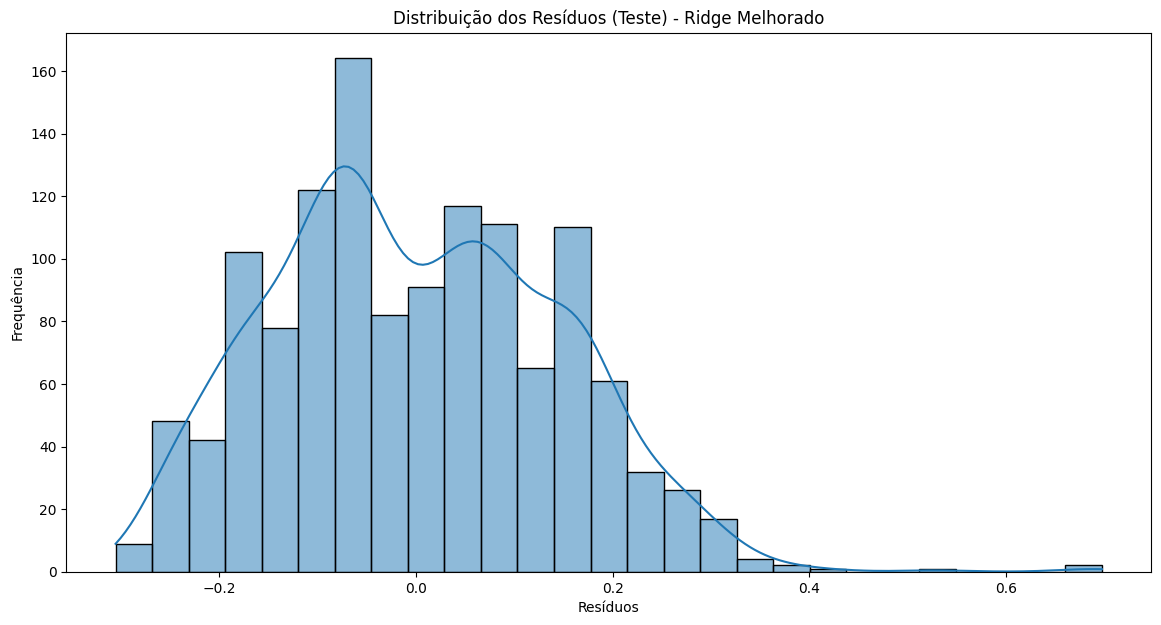

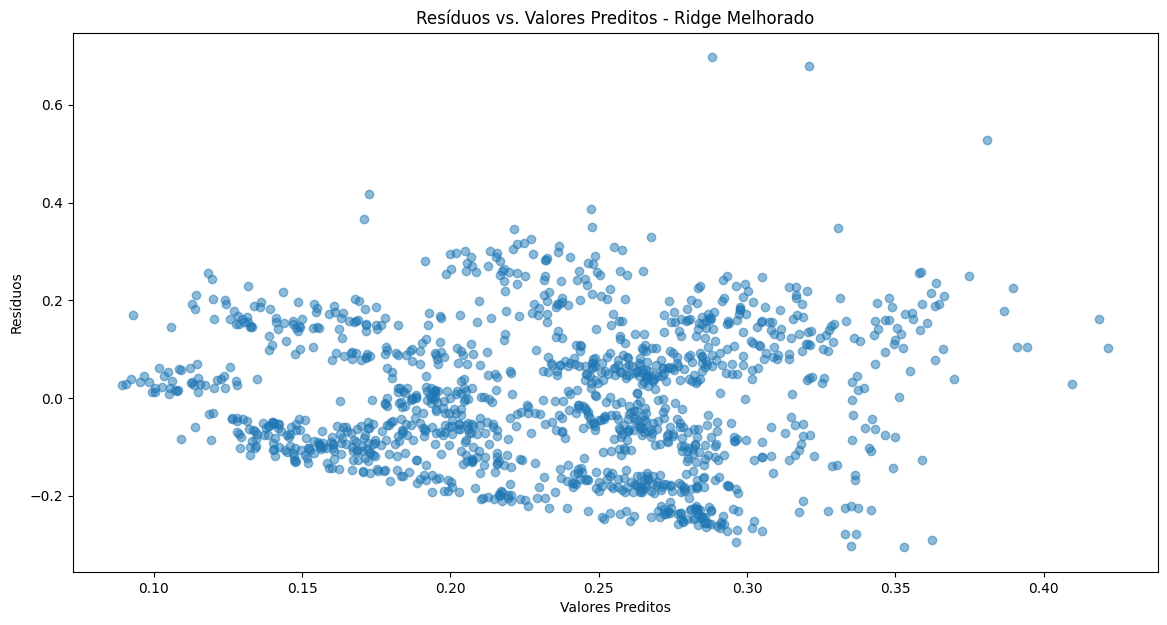

In [24]:
import seaborn as sns

# Calculando os resíduos no conjunto de teste
residuos_test = y_test - y_test_pred_ridge_best

# Plotando a distribuição dos resíduos
plt.figure(figsize=(14, 7))
sns.histplot(residuos_test, kde=True)
plt.title('Distribuição dos Resíduos (Teste) - Ridge Melhorado')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Plotando resíduos vs. valores preditos
plt.figure(figsize=(14, 7))
plt.scatter(y_test_pred_ridge_best, residuos_test, alpha=0.5)
plt.title('Resíduos vs. Valores Preditos - Ridge Melhorado')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()


Após realizarmos o ajuste de hiperparâmetros utilizando o **GridSearchCV** para a **Ridge Regression**, obtivemos alguns insights importantes a partir das análises dos gráficos e das métricas calculadas.

### Gráfico da Distribuição dos Resíduos (Teste)
No gráfico de distribuição dos resíduos do conjunto de teste, podemos observar que os resíduos estão concentrados em torno de zero, o que é um bom indicativo de que o modelo não possui um viés significativo. Contudo, a distribuição não é perfeitamente simétrica, e há uma leve assimetria positiva, indicando que o modelo tende a subestimar as vendas em alguns casos. Essa distribuição também sugere que ainda há espaço para melhorias no modelo, especialmente para capturar valores extremos de vendas que o modelo está deixando passar.

### Gráfico de Resíduos vs. Valores Preditos
O gráfico de dispersão dos resíduos em relação aos valores preditos nos mostra que a maioria dos resíduos está razoavelmente dispersa em torno de zero. No entanto, há um padrão discernível, onde os resíduos aumentam conforme os valores preditos crescem, sugerindo que o modelo está tendo dificuldade em prever com precisão os valores de vendas mais altos. Este comportamento pode ser um sinal de que o modelo Ridge, apesar de ajustado, ainda não está capturando adequadamente a complexidade dos dados, especialmente em situações de vendas muito altas.

### Conclusão Geral
Os resultados após o ajuste com GridSearch mostram uma melhoria modesta no desempenho do modelo Ridge, como evidenciado por pequenas reduções no RMSE e MAE, e um ligeiro aumento no R². No entanto, os gráficos indicam que o modelo ainda pode ser aprimorado. A persistência de resíduos significativos para vendas elevadas sugere que outros modelos ou abordagens, talvez envolvendo características mais complexas ou interações não lineares, poderiam ser mais eficazes para capturar a totalidade dos padrões presentes nos dados.